# solution of weight initialization using HE initialization in relu activation function


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_excel(r'D:\copy of htdocs\practice\Python\200days\Day184 Dee[ Learning Day 14\dataset.xlsx')

In [17]:
df.head()

,X,Y,class
0,0.3160,0.9870,0
1,2.1200,-0.0462,1
2,0.8800,-0.0758,0
3,-0.0551,-0.0373,1
4,0.8300,-0.5390,1


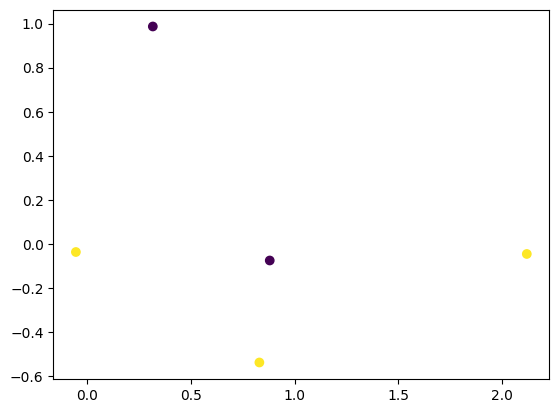

In [18]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [19]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [20]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [21]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                30        
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Set parameters to 0
model.get_weights()

[array([[ 6.4616770e-01, -1.1242085e+00,  2.7619323e-01, -1.4143163e-01,
          1.9082674e+00, -7.7626050e-01, -5.6510133e-04, -2.2061431e+00,
         -1.1399732e-01,  7.3563486e-01],
        [ 5.6696427e-01,  2.9022098e-01,  5.7278687e-01, -1.7227358e-01,
         -1.2568448e+00, -3.8320279e-01,  9.6201462e-01, -1.3244603e+00,
          7.9500300e-01,  8.8550979e-01]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.21525396, -0.5447102 , -0.78084135, -0.7625658 , -0.27150753,
         -0.21866545,  0.5310576 , -0.63287383,  0.17025574, -0.28582758],
        [ 0.6899725 ,  0.5641353 , -0.6100113 ,  0.68123573, -0.02411555,
          0.02220652, -0.237022  ,  0.65246934, -0.21627565,  0.06909043],
        [ 0.481638  , -0.42018166,  0.7302123 ,  0.62258226, -0.11601657,
          0.04058585, -0.18144199,  0.19390918,  0.11871063,  0.02430807],
        [-0.9809873 ,  0.6963399 , -0.38797656, -0.3029177 , -0.19816305,
          0.29338038,

In [23]:
initial_weights = model.get_weights()

In [24]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)

initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)

initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)

initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [25]:
model.set_weights(initial_weights)

In [26]:
model.get_weights()

[array([[-0.65100706,  0.7753106 , -0.00871301, -1.3703313 ,  0.17781453,
         -0.98907864,  0.529154  , -0.42838666, -0.63807654,  2.082476  ],
        [-0.16942573,  0.31305626,  0.15206033, -0.6424855 ,  0.8553218 ,
         -0.30129817, -0.21346748, -0.516142  ,  0.84380376, -0.8323182 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 3.90225530e-01,  5.34317747e-04,  1.30957693e-01,
          1.11900255e-01,  4.87111285e-02,  3.20743293e-01,
          1.15640111e-01,  3.37201506e-01, -1.48333877e-01,
         -2.49660984e-01],
        [-1.67033464e-01,  5.36267102e-01, -7.88884237e-04,
         -2.54258458e-02, -3.75300080e-01, -1.05732076e-01,
         -1.43128023e-01,  3.20701003e-02, -2.02409044e-01,
          2.62051642e-01],
        [-2.44764909e-01,  1.21683910e-01,  7.08445162e-03,
         -3.40233147e-01,  6.44171089e-02,  3.47104147e-02,
         -6.95366412e-02, -2.83922166e-01,  3.16411606e-03,
         -2.5721049

In [27]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100


1/1 [==============================] - 1s 874ms/step - loss: 0.6922 - accuracy: 0.5000 - val_loss: 0.6944 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 0.6915 - accuracy: 0.7500 - val_loss: 0.6932 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 0.6908 - accuracy: 0.7500 - val_loss: 0.6925 - val_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 25ms/step - loss: 0.6901 - accuracy: 0.7500 - val_loss: 0.6920 - val_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 27ms/step - loss: 0.6896 - accuracy: 0.7500 - val_loss: 0.6914 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 0.6891 - accuracy: 0.5000 - val_loss: 0.6908 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 0.6887 - accuracy: 0.5000 - val_loss: 0.6902 - val_accuracy: 1.0000
Epoch 8/100
1/1 [======

In [29]:
model.get_weights()

[array([[-0.67620885,  0.8493102 , -0.00948341, -1.4895004 ,  0.23160994,
         -0.91970474,  0.50580037, -0.46138525, -0.5373369 ,  2.1774306 ],
        [-0.1946422 ,  0.22279312,  0.15121242, -0.7615712 ,  0.9673892 ,
         -0.23195514, -0.18844174, -0.549142  ,  0.94539964, -0.7357802 ]],
       dtype=float32),
 array([ 0.02517069, -0.11097625, -0.00084815,  0.11933692,  0.06513812,
        -0.06941372, -0.03458707,  0.03299403,  0.0055478 , -0.02735518],
       dtype=float32),
 array([[ 3.90225530e-01,  1.10663310e-01,  1.30957693e-01,
          1.74215242e-01,  4.90953326e-02,  2.23785385e-01,
          2.19527587e-01,  3.07435572e-01, -1.84869111e-01,
         -2.49660984e-01],
        [-1.67033464e-01,  6.18876219e-01, -7.88884237e-04,
          4.59219329e-02, -3.58283371e-01, -1.54045656e-01,
         -1.43128023e-01,  3.20701003e-02, -1.19416654e-01,
          3.61098558e-01],
        [-2.44764909e-01,  3.86925116e-02,  7.08445162e-03,
         -3.06314468e-01,  6.44171

9600/9600 [==============================] - 7s 754us/step


<Axes: >

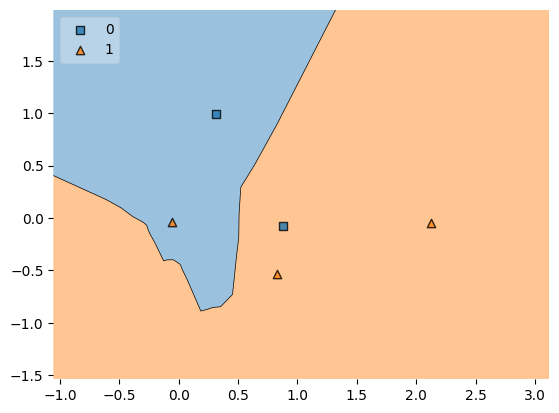

In [30]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)